In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tsf-datasets/student_scores.csv
/kaggle/input/tsf-datasets/matches.csv
/kaggle/input/tsf-datasets/deliveries.csv
/kaggle/input/tsf-datasets/globalterrorismdb_0718dist.csv
/kaggle/input/tsf-datasets/india-news-headlines.csv
/kaggle/input/tsf-datasets/SampleSuperstore.csv
/kaggle/input/tsf-datasets/Iris.csv


In [2]:
df = pd.read_csv('../input/tsf-datasets/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [5]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [6]:
df.shape

(9977, 13)

# Data Exploration

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


## Basic EDA

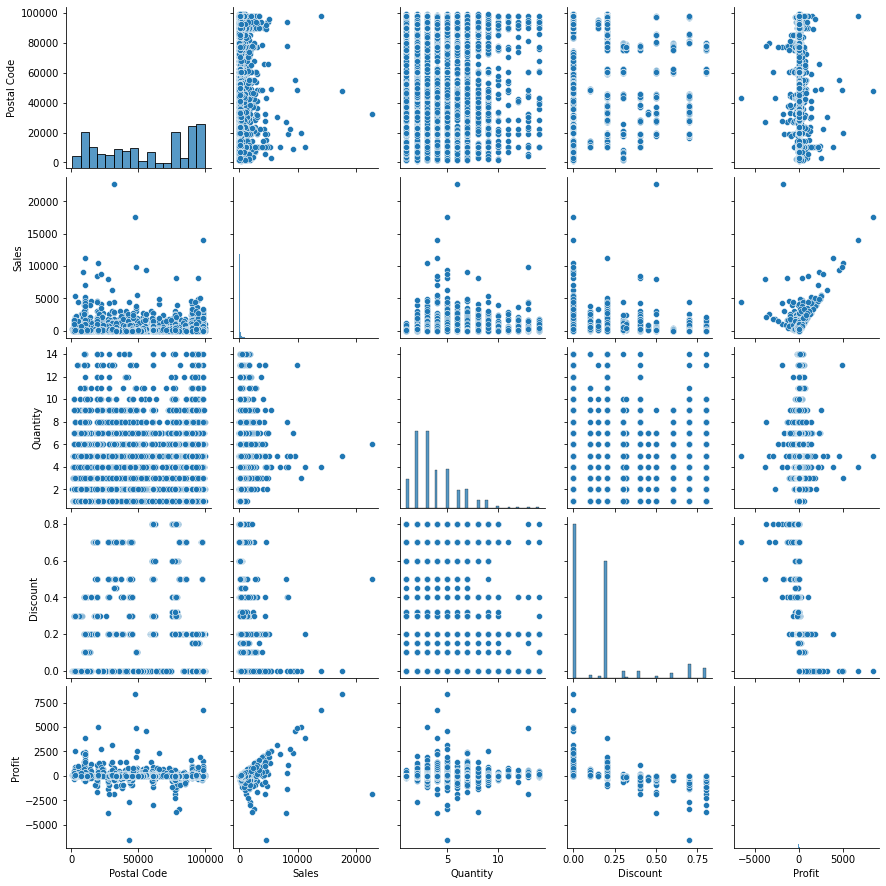

In [8]:
sns.pairplot(df)

## Questions:

* what is the most beneficial categories?
* what state makes the most sales?
* Is there any relationship between discount and sales?
* Is there any relationship between discount and profits?

In [9]:
copy = df.copy()
copy.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
copy.sort_values(by=['Sales'], inplace=True, ascending=False)
copy.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
2623,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856


In [11]:
cat_vs_sales = copy.groupby(['Category']).sum()
cat_vs_sales

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,118006465,741306.3133,8020,368.59,18421.8137
Office Supplies,329670858,718735.2440,22861,946.20,122364.6608
Technology,102603754,836154.0330,6939,244.40,145454.9481


**It is clear that Technology comes in the first place and then furniture.**
**But There is something strange, office supplies make more profits than funriture.**

<AxesSubplot:xlabel='Category', ylabel='Sales'>

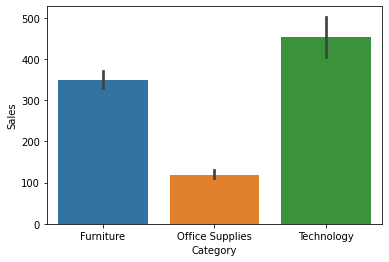

In [12]:
sns.barplot(x='Category', y='Sales', data=df)

<AxesSubplot:xlabel='Category', ylabel='Profit'>

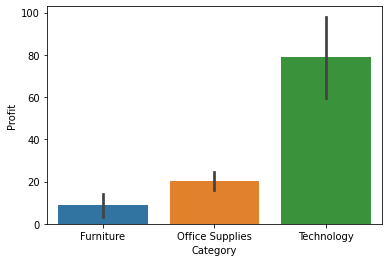

In [13]:
sns.barplot(x='Category', y='Profit', data=df)

In [14]:
state_grouped = copy.groupby(['State'])['Sales']
state_grouped.describe()

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
Alabama,61.0,319.846557,545.761807,3.620,19.56000,70.980,358.58000,3040.000
Arizona,224.0,157.508933,249.710692,1.408,15.16400,61.512,201.98400,1879.960
Arkansas,60.0,194.635500,316.405669,4.300,19.77750,54.420,209.83750,1793.980
California,1996.0,229.246629,491.510940,0.990,19.81800,61.156,225.36400,8187.650
Colorado,182.0,176.418231,324.415072,1.080,15.16000,51.016,175.41800,2549.985
Connecticut,82.0,163.223866,251.732268,3.520,14.71250,50.000,181.91175,1133.350
Delaware,96.0,285.948635,1112.818485,3.380,19.95000,67.005,202.86700,10499.970
District of Columbia,10.0,286.502000,547.419707,9.640,20.26500,35.800,41.04750,1379.920
Florida,383.0,233.612815,1205.490630,1.167,11.95200,41.472,182.83200,22638.480


In [15]:
state_grouped.sum()

State
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
California              457576.2715
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80162.5370
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 75879.6440
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

In [16]:
state_grouped.sum().max()

457576.2715

**Calofornia comes first with 457576.2715 sum sales**

<AxesSubplot:xlabel='State', ylabel='Sales'>

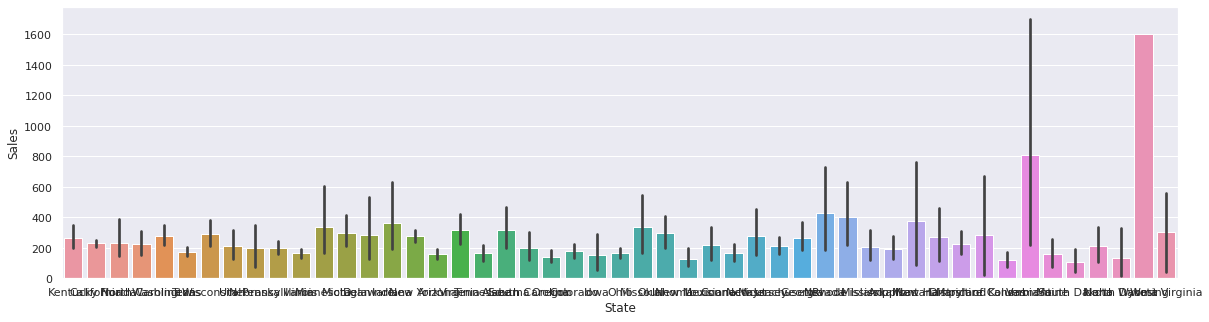

In [17]:
sns.set(rc={"figure.figsize":(20, 5)})
sns.barplot(x='State', y='Sales', data=df)

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

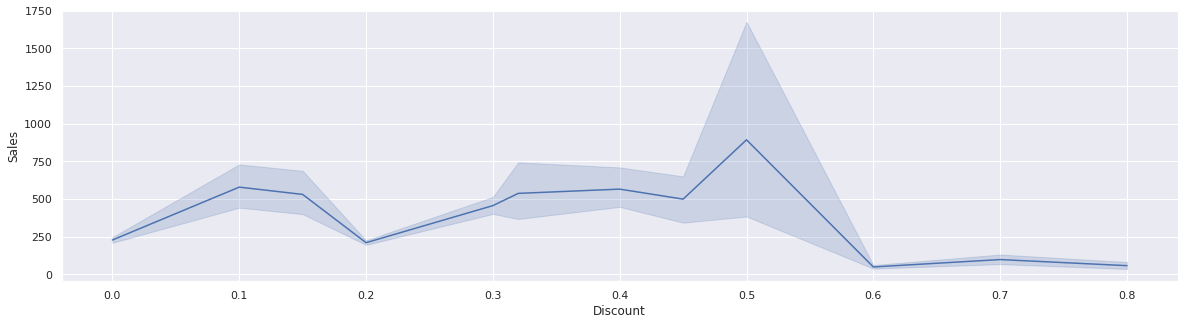

In [18]:
sns.lineplot(x='Discount', y='Sales', data=df)

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

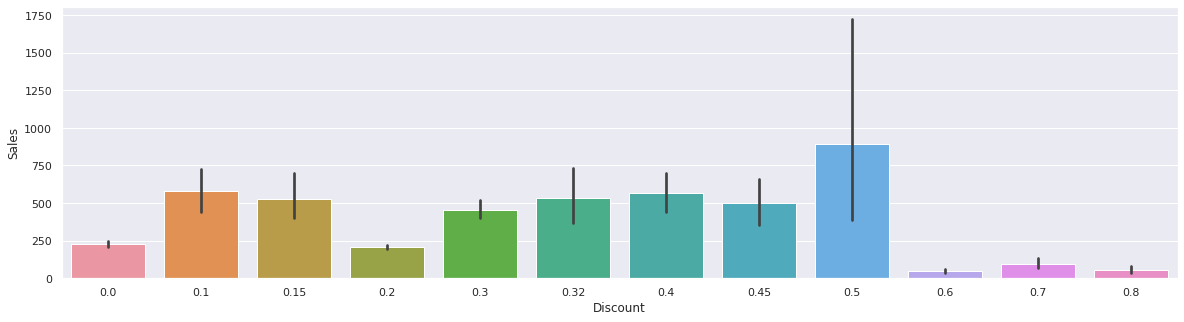

In [19]:
sns.barplot(x='Discount', y='Sales', data=df)

**It looks like that when the discount exceeds 0.5 the sales start to decline.**

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

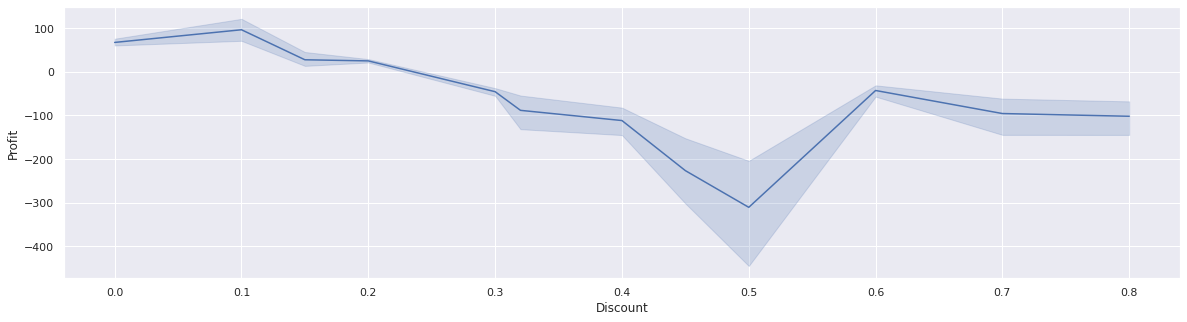

In [20]:
sns.lineplot(x='Discount', y='Profit', data=df)

**This is very weird, that when you make the most sales, you make your worst record of profits.**<br>

**So to make most profits you should give 0.1 discount.**


<AxesSubplot:xlabel='Discount', ylabel='Quantity'>

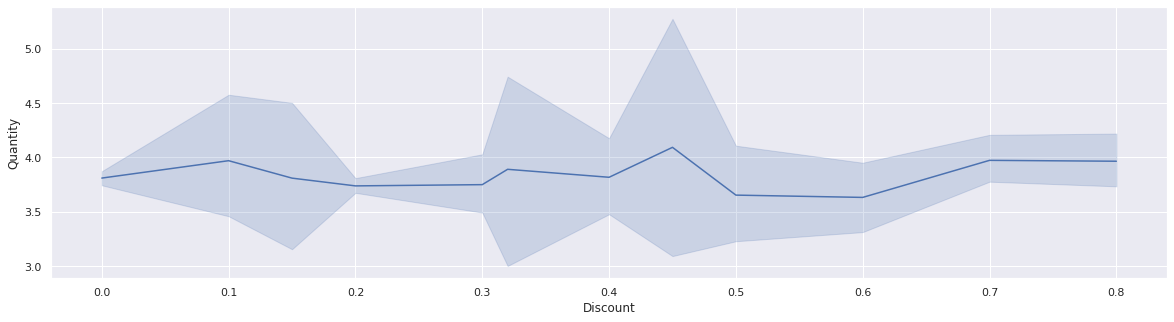

In [21]:
sns.lineplot(x='Discount', y='Quantity', data=df)

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

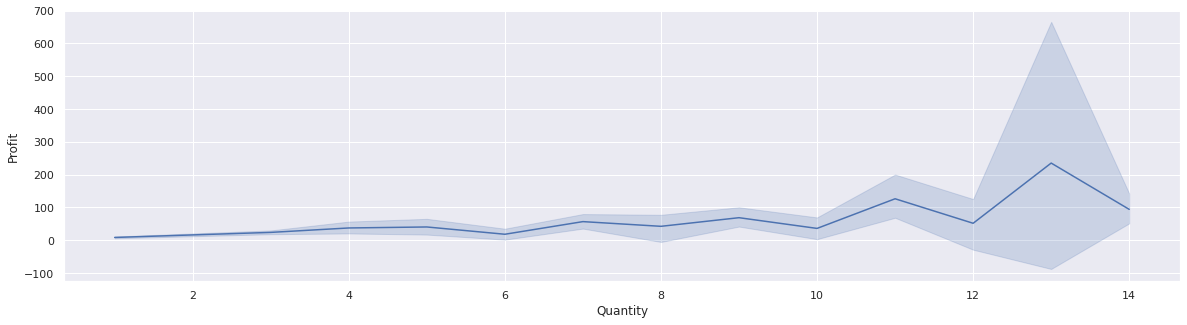

In [22]:
sns.lineplot(x='Quantity', y='Profit', data=df)